In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA

# Import Data

In [36]:
data = pd.read_csv("Data_Final", index_col = 0)
data.head()

,User_id,Bus_id,Star,Useful,Cool,Funny,Review,State,City,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star
0,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0,0,0,"Great burgers,fries and salad! Burgers have a...",CA,Goleta,4.0,922,1687,694,1070,"2015,2016,2017,2018,2019,20,20,2021",51,4.20
1,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5.0,0,0,0,We were a bit weary about trying the Shellfish...,CA,Santa Barbara,4.0,338,800,144,353,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",30,4.12
2,Uk3X2AypU8AqvcYEVf7s6Q,eL4lyE7LNoXEMvpcJ8WNVw,3.0,5,0,0,This was a tough one! On the merits of the w...,CA,Santa Barbara,4.0,431,2126,1245,1476,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",76,4.05
3,LcqNuhqaYt5ekKzaRirmIg,SZU9c8V2GuREDN5KgyHFJw,5.0,2,1,0,"I love trying fresh seafood on piers, wharfs a...",CA,Santa Barbara,4.0,258,452,125,183,"2015,2016,2017",37,3.99
4,gasLVm0KRwrVhPGRcqATjw,CHh0ZFrQcsk4boOItr2Zuw,4.0,1,2,0,I stopped in because I was hungry for some sna...,CA,Carpinteria,3.0,1638,2658,933,2297,"2014,2015,2016,2017,2018,2019,20,20,2021",105,3.79


In [6]:
data.shape

(53845, 17)

In [7]:
data["City"].value_counts()

Santa Barbara                       42501
Goleta                               6009
Carpinteria                          2557
Isla Vista                           1425
Montecito                             848
Summerland                            406
Santa  Barbara                         20
Santa Clara                            15
Truckee                                13
Mission Canyon                         10
Cerritos                               10
Santa Barbara                           6
Santa Barbra                            4
Real Goleta                             4
Santa Maria                             3
Los Angeles                             3
Sparks                                  2
Salinas                                 2
Santa Barbara & Ventura Counties        1
Aliso Viejo                             1
Reno                                    1
South Lake Tahoe                        1
Port Hueneme                            1
Kings Beach                       

In [8]:
(1 + 1 + 1 + 1 + 1 + 1 + 2 + 2 + 3 + 3 + 10 + 13 + 15) / 53845

0.0010028786331135668

In [9]:
(42501 + 20 + 6 + 1) / 53845

0.7898226390565513

In [11]:
list(data["Star"].value_counts() / data.shape[0])

[0.397214226019129,
 0.346457424087659,
 0.15683907512303835,
 0.06425851982542483,
 0.03523075494474882]

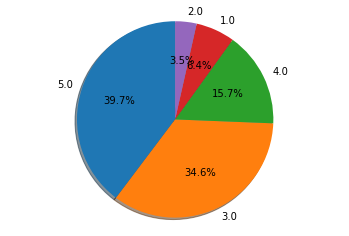

In [12]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = data["Star"].unique()
sizes = data["Star"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Pre-processing Data

In [18]:
data["Elite"] = data["Elite"].str.replace("20,20", "2020").str.split(",")
data["Elite_Count"] = data["Elite"].str.len()
data["Elite_Count"].value_counts()

5.0     6026
3.0     5537
6.0     5263
4.0     5047
2.0     4125
7.0     2842
10.0    2448
8.0     2414
11.0    2103
1.0     1754
9.0     1694
12.0    1273
13.0    1008
14.0     599
15.0     187
16.0      98
Name: Elite_Count, dtype: int64

In [19]:
data["target"] = np.where(data["Star"] > 3, 1, 0)
data["target"].value_counts()

1    40043
0    13802
Name: target, dtype: int64

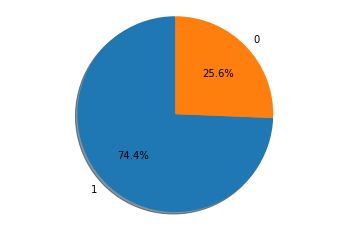

In [20]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = data["target"].unique()
sizes = data["target"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [23]:
documents = []
X = data.Review
stemmer = WordNetLemmatizer()
for i in range(0, len(X)):
    # Remove all the special characters, like parathesis
    document = re.sub(r'\W', ' ', str(X[i]))
    # remove all single characters: like a, b, c, d
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    # Converting to Lowercase
    document = document.lower()
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)

In [24]:
vectorizer = CountVectorizer(max_features=1500, min_df=0.1, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()
X.shape

(53845, 73)

In [25]:
# f_n = open("negative-words.txt", "r")
# Negative_words = f_n.readlines()
# f_p = open("positive-words.txt", "r")
# Positive_words = f_p.readlines()
# Voca = [i.rstrip('\n') for i in Positive_words] + [i.rstrip('\n') for i in Negative_words]
# vectorizer = CountVectorizer(vocabulary=np.unique(Voca))
# X = vectorizer.fit_transform(documents).toarray()
# X.shape

# Perform PCA on Word Vectors

In [26]:
pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(X)
X_pca.shape

(53845, 37)

In [27]:
print(pca.explained_variance_ratio_)

[0.31175142 0.04982528 0.03231102 0.02612244 0.02551691 0.02385821
 0.02109604 0.01812277 0.01721323 0.01538586 0.01508694 0.0139708
 0.01350124 0.01282562 0.0125104  0.01193479 0.01126736 0.01102034
 0.01085519 0.01025151 0.00998925 0.00987464 0.00955838 0.00922996
 0.00900075 0.00869201 0.00847508 0.00837253 0.00825953 0.00795239
 0.00779572 0.00771448 0.00753718 0.0073548  0.0072956  0.00727082
 0.00715245]


In [28]:
pca_data = pd.DataFrame(data = X_pca)
pca_data.columns = ['pc' + str(col+1) for col in pca_data.columns]
pca_data.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37
0,-2.645244,-0.702487,0.201056,-0.111868,0.185435,-0.011252,-0.778872,-0.141824,0.074901,0.018021,...,0.117957,0.041555,0.313839,0.099993,-0.290924,-0.341080,0.740567,0.084053,-0.240109,0.241797
1,3.893357,0.114327,-1.502976,1.505943,-1.224943,0.756691,-1.896190,-0.445000,0.972648,1.103213,...,-0.686052,-0.068462,-0.180470,0.494082,0.138534,0.283003,-0.233702,0.468619,0.235116,0.155252
2,-0.754240,1.976188,2.397573,-1.900509,-0.826635,-1.611485,-0.007414,1.463028,1.524165,1.376494,...,-0.843222,-0.391905,-0.938738,0.021158,-0.128340,0.458312,-0.753753,-0.173154,-0.041786,1.288891
3,12.324839,-0.835426,-0.990203,-0.504175,-1.154556,-0.377879,0.445213,0.570649,0.597910,0.323739,...,0.335307,-1.174861,-1.418306,0.559443,-1.443027,-0.459170,0.342850,1.023919,0.924196,-1.487887
4,0.411222,-0.768758,-0.056776,-0.486688,-0.898242,-0.461462,0.064887,-0.791135,-0.874975,1.302617,...,0.032975,-0.110042,0.021370,0.366447,-0.445082,-0.456512,0.687945,0.127625,-0.354086,0.540395


In [29]:
data = pd.concat([data, pca_data], axis=1)
data.head()

,User_id,Bus_id,Star,Useful,Cool,Funny,Review,State,City,Bus_Ave_Star,...,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37
0,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0,0,0,"Great burgers,fries and salad! Burgers have a...",CA,Goleta,4.0,...,0.117957,0.041555,0.313839,0.099993,-0.290924,-0.341080,0.740567,0.084053,-0.240109,0.241797
1,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5.0,0,0,0,We were a bit weary about trying the Shellfish...,CA,Santa Barbara,4.0,...,-0.686052,-0.068462,-0.180470,0.494082,0.138534,0.283003,-0.233702,0.468619,0.235116,0.155252
2,Uk3X2AypU8AqvcYEVf7s6Q,eL4lyE7LNoXEMvpcJ8WNVw,3.0,5,0,0,This was a tough one! On the merits of the w...,CA,Santa Barbara,4.0,...,-0.843222,-0.391905,-0.938738,0.021158,-0.128340,0.458312,-0.753753,-0.173154,-0.041786,1.288891
3,LcqNuhqaYt5ekKzaRirmIg,SZU9c8V2GuREDN5KgyHFJw,5.0,2,1,0,"I love trying fresh seafood on piers, wharfs a...",CA,Santa Barbara,4.0,...,0.335307,-1.174861,-1.418306,0.559443,-1.443027,-0.459170,0.342850,1.023919,0.924196,-1.487887
4,gasLVm0KRwrVhPGRcqATjw,CHh0ZFrQcsk4boOItr2Zuw,4.0,1,2,0,I stopped in because I was hungry for some sna...,CA,Carpinteria,3.0,...,0.032975,-0.110042,0.021370,0.366447,-0.445082,-0.456512,0.687945,0.127625,-0.354086,0.540395


In [30]:
data.shape

(53845, 56)

# Feature Selection

In [31]:
feature_data = data.copy()
feature_data.drop(columns = ['User_id', 'Bus_id', 'Star', 'State', 'Review', 'City', 'Elite'], inplace=True)

In [32]:
feature_data.head()

,Useful,Cool,Funny,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,User_Fans,Users_Ave_Star,...,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37
0,0,0,0,4.0,922,1687,694,1070,51,4.20,...,0.117957,0.041555,0.313839,0.099993,-0.290924,-0.341080,0.740567,0.084053,-0.240109,0.241797
1,0,0,0,4.0,338,800,144,353,30,4.12,...,-0.686052,-0.068462,-0.180470,0.494082,0.138534,0.283003,-0.233702,0.468619,0.235116,0.155252
2,5,0,0,4.0,431,2126,1245,1476,76,4.05,...,-0.843222,-0.391905,-0.938738,0.021158,-0.128340,0.458312,-0.753753,-0.173154,-0.041786,1.288891
3,2,1,0,4.0,258,452,125,183,37,3.99,...,0.335307,-1.174861,-1.418306,0.559443,-1.443027,-0.459170,0.342850,1.023919,0.924196,-1.487887
4,1,2,0,3.0,1638,2658,933,2297,105,3.79,...,0.032975,-0.110042,0.021370,0.366447,-0.445082,-0.456512,0.687945,0.127625,-0.354086,0.540395


In [17]:
feature_data.to_csv('data.csv')

In [15]:
import seaborn as sns

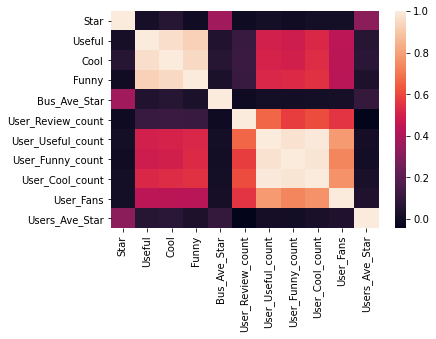

In [37]:
sns.heatmap(data.corr())